In [79]:
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt

In [88]:
path = r'./rating.csv'
min_num_anime=100
max_num_anime=1000
user_dict = []
with open(path, encoding='utf8') as file:
    line_no=-1
    anime_list = []
    for line in file:
        if line_no!=-1:
            t = line[:-1].split(',')

            if line_no==0:
                prev_id = t[0]
                
            if t[0]!=prev_id:
                if len(anime_list)>min_num_anime and len(anime_list)<max_num_anime:
                    temp=(prev_id,anime_list.copy())
                    user_dict.append(temp)
                prev_id = t[0]
                anime_list.clear()
            else:
                anime_list.append(t[1])
        line_no+=1
        
user_dict = dict(user_dict)

In [89]:
lengths = [len(user_dict[each]) for each in user_dict]

In [90]:
print(len(lengths))

24260


In [ ]:
plt.scatter(range(len(lengths)),lengths)
plt.show()

In [ ]:
with open(r'user_anime.dict','w') as file:
    file.write(str(user_dict))

In [ ]:
with open(r'./user_anime.py','w') as file:
    file.write('user_anime_dict=')
    file.write(str(user_dict))

In [91]:
anime_list = {}
for key in user_dict.keys():
    temp = user_dict[key]
    for each in temp:
        if each not in anime_list.keys():
            anime_list[each] = 1
        else:
            anime_list.update({each:anime_list[each]+1})

In [92]:
num_readers = list(anime_list.values())

In [ ]:
print(max(num_readers), min(num_readers), sum(num_readers)/len(num_readers))

In [96]:
print(anime_list['20'])

7816


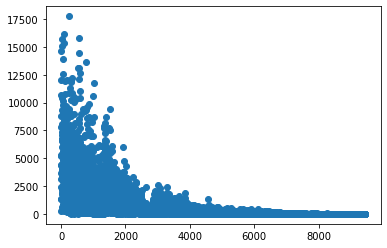

In [94]:
plt.scatter(range(len(num_readers[:])), num_readers[:])
plt.show()

In [ ]:
with open('anime_details.py', 'a') as file:
    file.write('\nanime_dict=')
    file.write(str(anime_list))

In [ ]:
with open('anime_num_users.dict', 'w') as file:
    file.write(str(anime_list))

In [100]:
from user_history import *

In [101]:
path = r'./anime.csv'
anime_list=[]
genre_list=[]
keys = []
genres = []

with open(path, encoding='utf8') as file:
    line_no=-1
    for line in file:
        line = line[:-1]
        if line_no==-1:
            keys = line.split(',')
        else:
            anime = {}
            t = line.split('"')
            if len(t)==1:
                # this is when there is just 1 anime and 1 genre
                
                t = t[0].split(',')
                id = t[0]
                
                # check if the anime is in the list and its genre is not blank
                if id in anime_num_users_dict.keys() and t[2]!='':
                    for key, each in zip(keys,t):
                        if key != 'genre':
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                    genres = [t[2]]
            else:
                if len(t[0].split(',')) == 2 and len(t) == 3:
                    # this is when there are multiple animes AND one genre
                    
                    id = t[0][:-1]
                    genre = t[-1].split(',')[1]
                    if id in anime_num_users_dict.keys() and genre!='':
                        anime[keys[0]] = id
                        anime[keys[1]] = t[1]
                        for key, each in zip(keys[2:], t[-1].split(',')[2:]):
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                        genres = [genre]
                        
                elif len(t) > 3:
                    # this is when there are multiple animes AND multiple genres
                    
                    id = t[0][:-1]
                    if id in anime_num_users_dict.keys():
                        anime[keys[0]] = id
                        anime[keys[1]] = t[1]
                        for key, each in zip(keys[-4:], t[-1].split(',')[1:]):
                            if key in ['episodes','rating','members']:
                                anime[key] = float(each)
                            else:
                                anime[key] = each
                        genres = t[3].split(', ')
                else:
                    # this is when there are one anime AND multiple genres
                    
                    print(t)
                    
                    id = t[0].split(',')[0]
                    if id in anime_num_users_dict.keys():
                        anime[keys[0]] = id
                        anime[keys[1]] = t[0].split(',')[1]
                        for key, each in zip(keys[-4:], t[-1].split(',')[1:]):
#                             print(key, each)
                            if key in ['episodes','rating','members']:
                                if each not in ['Unknown','']:
                                    anime[key] = float(each)
                                else:
                                    anime[key] = 1
                            else:
                                anime[key] = each
                        genres = t[-2].split(', ')
                    
        for each in genres:
            if each not in genre_list:
                genre_list.append(each)
        
        if anime:
            anime['genre'] = genres
#             print(line_no, type(id))
            anime['num_viewers'] = anime_num_users_dict[anime['anime_id']]
            anime_list.append(anime)
        line_no+=1

['32281,Kimi no Na wa.,', 'Drama, Romance, School, Supernatural', ',Movie,1,9.37,200630']
type Movie
episodes 1
rating 9.37
members 200630
['5114,Fullmetal Alchemist: Brotherhood,', 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen', ',TV,64,9.26,793665']
type TV
episodes 64
rating 9.26
members 793665
['28977,Gintama°,', 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', ',TV,51,9.25,114262']
type TV
episodes 51
rating 9.25
members 114262
['9253,Steins;Gate,', 'Sci-Fi, Thriller', ',TV,24,9.17,673572']
type TV
episodes 24
rating 9.17
members 673572
['9969,Gintama&#039;,', 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', ',TV,51,9.16,151266']
type TV
episodes 51
rating 9.16
members 151266
['32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,', 'Comedy, Drama, School, Shounen, Sports', ',TV,10,9.15,93351']
type TV
episodes 10
rating 9.15
members 93351
['11061,Hunter x Hunter (2011),', 'Action, Adventure, Shounen, Super Power', ',TV,148,9

type Movie
episodes 1
rating 8.29
members 20602
['10271,Gyakkyou Burai Kaiji: Hakairoku-hen,', 'Game, Psychological, Seinen, Thriller', ',TV,26,8.29,55566']
type TV
episodes 26
rating 8.29
members 55566
['22507,Initial D Final Stage,', 'Cars, Seinen, Sports', ',TV,4,8.29,19702']
type TV
episodes 4
rating 8.29
members 19702
['3701,Kaiba,', 'Adventure, Mystery, Romance, Sci-Fi', ',TV,12,8.29,56927']
type TV
episodes 12
rating 8.29
members 56927
['19123,One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari,', 'Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power', ',Special,1,8.29,17247']
type Special
episodes 1
rating 8.29
members 17247
['33255,Saiki Kusuo no Ψ-nan (TV),', 'Comedy, School, Shounen, Supernatural', ',TV,120,8.29,47092']
['372,Cardcaptor Sakura Movie 2: Fuuin Sareta Card,', 'Comedy, Drama, Fantasy, Magic, Romance, Shoujo', ',Movie,1,8.28,60637']
type Movie
episodes 1
rating 8.28
members 60637
['265,Hajime no Ippo: Mashiba vs. Kimura,', 'Comedy, Shounen

members 4584
['2158,Terra e... (TV),', 'Action, Drama, Military, Sci-Fi, Space', ',TV,24,8.07,36941']
type TV
episodes 24
rating 8.07
members 36941
['22319,Tokyo Ghoul,', 'Action, Drama, Horror, Mystery, Psychological, Seinen, Supernatural', ',TV,12,8.07,618056']
type TV
episodes 12
rating 8.07
members 618056
['11113,Usagi Drop Specials,', 'Josei, Slice of Life', ',Special,4,8.07,36351']
type Special
episodes 4
rating 8.07
members 36351
['6586,Yume-iro Pâtissière,', 'Kids, School, Shoujo', ',TV,50,8.07,36921']
type TV
episodes 50
rating 8.07
members 36921
['66,Azumanga Daioh,', 'Comedy, School, Slice of Life', ',TV,26,8.06,170901']
type TV
episodes 26
rating 8.06
members 170901
['8142,Colorful (Movie),', 'Drama, Slice of Life, Supernatural', ',Movie,1,8.06,63263']
type Movie
episodes 1
rating 8.06
members 63263
['6438,Detective Conan OVA 09: The Stranger in 10 Years...,', 'Adventure, Comedy, Mystery, Police, Shounen', ',OVA,1,8.06,9649']
type OVA
episodes 1
rating 8.06
members 9649
['3

type Movie
episodes 1
rating 7.91
members 7515
['17895,Golden Time,', 'Comedy, Romance, Seinen', ',TV,24,7.92,273191']
type TV
episodes 24
rating 7.92
members 273191
['1824,Hadashi no Gen,', 'Drama, Historical', ',Movie,1,7.92,16474']
type Movie
episodes 1
rating 7.92
members 16474
['4192,Hayate no Gotoku!!,', 'Action, Comedy, Harem, Parody, Romance', ',TV,25,7.92,67323']
type TV
episodes 25
rating 7.92
members 67323
['10357,Jinrui wa Suitai Shimashita,', 'Comedy, Fantasy, Seinen', ',TV,12,7.92,89373']
type TV
episodes 12
rating 7.92
members 89373
['19489,Little Witch Academia: Mahoujikake no Parade,', 'Adventure, Comedy, Fantasy, Magic, School', ',Movie,1,7.92,53024']
type Movie
episodes 1
rating 7.92
members 53024
['4472,Lucky☆Star: Original na Visual to Animation,', 'Comedy, Parody, School, Slice of Life', ',OVA,1,7.92,84833']
type OVA
episodes 1
rating 7.92
members 84833
['19613,New Initial D Movie: Legend 1 - Kakusei,', 'Action, Cars, Seinen, Sports', ',Movie,1,7.92,7695']
type Mo

members 57166
['6956,Working!!,', 'Comedy, Slice of Life', ',TV,13,7.82,189367']
type TV
episodes 13
rating 7.82
members 189367
['9441,Yume-iro Pâtissière SP Professional,', 'Shoujo, Slice of Life', ',TV,13,7.82,20397']
type TV
episodes 13
rating 7.82
members 20397
['233,Daa! Daa! Daa!,', 'Comedy, Sci-Fi, Shoujo', ',TV,78,7.81,12673']
type TV
episodes 78
rating 7.81
members 12673
['2397,Digimon Adventure: Bokura no War Game!,', 'Adventure, Comedy, Kids, Sci-Fi', ',Movie,1,7.81,37078']
type Movie
episodes 1
rating 7.81
members 37078
['345,Eikoku Koi Monogatari Emma,', 'Drama, Historical, Romance, Seinen, Slice of Life', ',TV,12,7.81,23877']
type TV
episodes 12
rating 7.81
members 23877
['71,Full Metal Panic!,', 'Action, Comedy, Mecha, Military, Sci-Fi', ',TV,24,7.81,256325']
type TV
episodes 24
rating 7.81
members 256325
['10793,Guilty Crown,', 'Action, Drama, Sci-Fi, Super Power', ',TV,22,7.81,460959']
type TV
episodes 22
rating 7.81
members 460959
['9760,Hoshi wo Ou Kodomo,', 'Adventu

type ONA
episodes 1
rating 7.71
members 8554
['10573,Prince of Tennis: Another Story II - Ano Toki no Bokura,', 'Shounen, Sports', ',OVA,4,7.71,6005']
type OVA
episodes 4
rating 7.71
members 6005
['8675,Seitokai Yakuindomo,', 'Comedy, School, Shounen, Slice of Life', ',TV,13,7.71,217617']
type TV
episodes 13
rating 7.71
members 217617
['1557,Shounen Onmyouji,', 'Action, Demons, Fantasy, Historical, Magic, Shoujo, Supernatural', ',TV,26,7.71,33321']
type TV
episodes 26
rating 7.71
members 33321
['14289,Sukitte Ii na yo.,', 'Romance, School, Shoujo', ',TV,13,7.71,233410']
type TV
episodes 13
rating 7.71
members 233410
['11743,Toaru Majutsu no Index: Endymion no Kiseki,', 'Action, Magic, Sci-Fi, Super Power', ',Movie,1,7.71,54873']
type Movie
episodes 1
rating 7.71
members 54873
['30458,Tokyo Ghoul: &quot;Jack&quot;,', 'Action, Drama, Horror, School, Seinen, Supernatural', ',OVA,1,7.71,70635']
type OVA
episodes 1
rating 7.71
members 70635
['29854,Ushio to Tora (TV),', 'Action, Adventure, 

members 19257
['11235,Amagami SS+ Plus,', 'Comedy, Romance, School, Slice of Life', ',TV,13,7.61,73813']
type TV
episodes 13
rating 7.61
members 73813
['586,Ayakashi: Japanese Classic Horror,', 'Fantasy, Historical, Horror', ',TV,11,7.61,34938']
type TV
episodes 11
rating 7.61
members 34938
['4981,Casshern Sins,', 'Action, Adventure, Drama, Psychological, Sci-Fi', ',TV,24,7.61,80307']
type TV
episodes 24
rating 7.61
members 80307
['2961,Digimon Adventure Movie,', 'Action, Fantasy, Kids, Sci-Fi', ',Movie,1,7.61,60753']
type Movie
episodes 1
rating 7.61
members 60753
['1747,Freedom,', 'Action, Adventure, Sci-Fi', ',OVA,7,7.61,13918']
type OVA
episodes 7
rating 7.61
members 13918
['2409,Gokudou-kun Manyuuki,', 'Adventure, Comedy, Fantasy, Magic', ',TV,26,7.61,8131']
type TV
episodes 26
rating 7.61
members 8131
['4039,Golgo 13 (TV),', 'Action, Adventure, Drama, Seinen, Thriller', ',TV,50,7.61,18687']
type TV
episodes 50
rating 7.61
members 18687
['2458,Kimagure Orange☆Road OVA,', 'Comedy, 

type Movie
episodes 1
rating 7.53
members 10263
['5251,Angel Densetsu,', 'Action, Comedy, School', ',OVA,2,7.52,10795']
type OVA
episodes 2
rating 7.52
members 10795
['68,Black Cat,', 'Adventure, Comedy, Sci-Fi, Shounen, Super Power', ',TV,23,7.52,150512']
type TV
episodes 23
rating 7.52
members 150512
['2553,Flanders no Inu,', 'Drama, Historical, Slice of Life', ',TV,52,7.52,2411']
type TV
episodes 52
rating 7.52
members 2411
['13335,Fuse: Teppou Musume no Torimonochou,', 'Action, Drama, Historical, Supernatural', ',Movie,1,7.52,13412']
type Movie
episodes 1
rating 7.52
members 13412
['1392,Future GPX Cyber Formula 11,', 'Drama, Sci-Fi, Shounen, Sports', ',OVA,6,7.52,1116']
type OVA
episodes 6
rating 7.52
members 1116
['19193,Ghost in the Shell: Arise - Border:3 Ghost Tears,', 'Mecha, Police, Psychological, Sci-Fi', ',Movie,1,7.52,21648']
type Movie
episodes 1
rating 7.52
members 21648
['506,Glass no Kamen,', 'Drama, Romance, Shoujo', ',TV,23,7.52,4218']
type TV
episodes 23
rating 7.5

['5684,Fresh Precure!,', 'Action, Comedy, Fantasy, Magic, Shoujo, Slice of Life', ',TV,50,7.45,7004']
type TV
episodes 50
rating 7.45
members 7004
['908,Fullmetal Alchemist: Premium Collection,', 'Comedy, Fantasy, Shounen', ',OVA,3,7.45,44313']
type OVA
episodes 3
rating 7.45
members 44313
['505,Fushigiboshi no☆Futagohime,', 'Comedy, Magic, Shoujo', ',TV,51,7.45,5074']
type TV
episodes 51
rating 7.45
members 5074
['15863,Ginga Kikoutai Majestic Prince,', 'Action, Mecha, School, Sci-Fi, Seinen, Space', ',TV,24,7.45,35196']
type TV
episodes 24
rating 7.45
members 35196
['246,Groove Adventure Rave,', 'Adventure, Comedy, Fantasy, Romance, Shounen', ',TV,51,7.45,56353']
type TV
episodes 51
rating 7.45
members 56353
['18835,Hakuouki Reimeiroku Tokuten Disc,', 'Action, Josei, Supernatural', ',OVA,2,7.46,2178']
type OVA
episodes 2
rating 7.46
members 2178
['6574,Hanamaru Youchien,', 'Comedy, Seinen, Slice of Life', ',TV,12,7.45,40243']
type TV
episodes 12
rating 7.45
members 40243
['5150,Hatsu

rating 7.35
members 1194
['3272,Kinnikuman,', 'Adventure, Comedy, Shounen, Sports', ',TV,137,7.35,3623']
type TV
episodes 137
rating 7.35
members 3623
['1516,Kirarin☆Revolution,', 'Comedy, Drama, Romance, Shoujo', ',TV,153,7.35,14932']
type TV
episodes 153
rating 7.35
members 14932
['32245,Kuromukuro,', 'Action, Mecha, Sci-Fi', ',TV,26,7.35,46323']
type TV
episodes 26
rating 7.35
members 46323
['11777,Lupin III: Chi no Kokuin - Eien no Mermaid,', 'Action, Adventure, Comedy, Shounen', ',Special,1,7.35,3069']
type Special
episodes 1
rating 7.35
members 3069
['1967,Mobile Suit Zeta Gundam: A New Translation - Heir to the Stars,', 'Drama, Mecha, Military, Sci-Fi, Space', ',Movie,1,7.35,6326']
type Movie
episodes 1
rating 7.35
members 6326
['3467,Nogizaka Haruka no Himitsu,', 'Comedy, Romance', ',TV,12,7.35,80820']
type TV
episodes 12
rating 7.35
members 80820
['16468,One Piece: Glorious Island,', 'Action, Adventure, Comedy, Fantasy, Shounen, Super Power', ',Special,2,7.35,12922']
type Spec

type Movie
episodes 1
rating 7.26
members 1406
['2602,Kenkou Zenrakei Suieibu Umishou,', 'Comedy, Ecchi, School, Shounen, Sports', ',TV,13,7.26,25814']
type TV
episodes 13
rating 7.26
members 25814
['5717,Kiniro no Corda: Secondo Passo,', 'Harem, Music, School, Shoujo', ',Special,2,7.26,24379']
type Special
episodes 2
rating 7.26
members 24379
['31610,Kyoukai no Rinne (TV) 2nd Season,', 'Comedy, Romance, School, Shounen, Supernatural', ',TV,25,7.26,15519']
type TV
episodes 25
rating 7.26
members 15519
['631,Mahoromatic Summer Special,', 'Comedy, Ecchi, Romance, Sci-Fi', ',Special,1,7.26,7945']
type Special
episodes 1
rating 7.26
members 7945
['629,Mahoutsukai Tai! OVA,', 'Comedy, Fantasy, Magic, Romance, Sci-Fi', ',OVA,6,7.26,4460']
type OVA
episodes 6
rating 7.26
members 4460
['14817,Mouretsu Pirates: Abyss of Hyperspace,', 'Sci-Fi, Space', ',Movie,1,7.26,7787']
type Movie
episodes 1
rating 7.26
members 7787
['12979,Naruto SD: Rock Lee no Seishun Full-Power Ninden,', 'Action, Comedy, 

['1046,Elf wo Karu Mono-tachi II,', 'Adventure, Comedy, Fantasy', ',TV,12,7.15,8004']
type TV
episodes 12
rating 7.15
members 8004
['16982,Hayate no Gotoku! Cuties,', 'Comedy, Harem, Parody, Romance, Shounen', ',TV,12,7.15,24044']
type TV
episodes 12
rating 7.15
members 24044
['2799,Hello! Sandybell,', 'Adventure, Romance, Shoujo', ',TV,47,7.15,2587']
type TV
episodes 47
rating 7.15
members 2587
['1020,Honoo no Mirage: Minagiwa no Hangyakusha,', 'Action, Drama, Historical, Romance, Shoujo, Shounen Ai, Supernatural', ',OVA,3,7.15,6006']
type OVA
episodes 3
rating 7.15
members 6006
['33242,IS: Infinite Stratos 2 - Infinite Wedding,', 'Harem, Comedy, Romance', ',Special,1,7.15,6604']
type Special
episodes 1
rating 7.15
members 6604
['29785,Jitsu wa Watashi wa,', 'Comedy, Fantasy, Romance, School, Shounen, Supernatural', ',TV,13,7.15,88500']
type TV
episodes 13
rating 7.15
members 88500
['11299,Keroro Gunsou: KeroZero Shupattsudayo! Zeninshuugou!,', 'Action, Adventure, Comedy, Mecha, Shoun

members 73241
['2692,CB Chara Go Nagai World,', 'Action, Comedy, Parody', ',OVA,3,7.05,989']
type OVA
episodes 3
rating 7.05
members 989
['1844,CLAMP Gakuen Tanteidan,', 'Action, Comedy, Mystery', ',TV,26,7.05,7830']
type TV
episodes 26
rating 7.05
members 7830
['8728,Code Geass: Hangyaku no Lelouch - Kiseki no Birthday Picture Drama,', 'School, Supernatural', ',Special,1,7.05,18422']
type Special
episodes 1
rating 7.05
members 18422
['2172,Crayon Shin-chan Movie 15: Arashi wo Yobu Utau Ketsu dake Bakudan!,', 'Comedy, Ecchi, Kids, School', ',Movie,1,7.05,1051']
type Movie
episodes 1
rating 7.05
members 1051
['2595,D.C.II: Da Capo II,', 'Drama, Ecchi, Romance, School', ',TV,13,7.05,25225']
type TV
episodes 13
rating 7.05
members 25225
['502,Dragon Ball Movie 1: Shen Long no Densetsu,', 'Action, Adventure, Comedy, Fantasy, Shounen, Super Power', ',Movie,1,7.05,30279']
type Movie
episodes 1
rating 7.05
members 30279
['22695,Dragon Ball Z: Summer Vacation Special,', 'Action, Adventure, Com

['9988,Otome wa Boku ni Koishiteru: Futari no Elder,', 'Drama, Romance, School', ',OVA,3,6.96,10579']
type OVA
episodes 3
rating 6.96
members 10579
['7845,Seton Doubutsuki,', 'Adventure, Fantasy', ',TV,45,6.96,187']
type TV
episodes 45
rating 6.96
members 187
['19285,Shingeki no Kyojin: Ano Hi Kara,', 'Action, Drama, Fantasy, Shounen, Super Power', ',Special,1,6.96,49593']
type Special
episodes 1
rating 6.96
members 49593
['1603,Super Robot Taisen OG: Divine Wars,', 'Action, Mecha, Sci-Fi', ',TV,25,6.96,5232']
type TV
episodes 25
rating 6.96
members 5232
['391,Tales of Phantasia The Animation,', 'Adventure, Fantasy, Shounen', ',OVA,4,6.96,16455']
type OVA
episodes 4
rating 6.96
members 16455
['20473,Teekyuu 3,', 'Comedy, School, Shounen, Sports', ',TV,12,6.96,13227']
type TV
episodes 12
rating 6.96
members 13227
['2725,Tenchi Muyou!: Galaxy Police Mihoshi Space Adventure,', 'Comedy, Magic, Parody, Police, Sci-Fi, Shounen, Space', ',OVA,1,6.96,6082']
type OVA
episodes 1
rating 6.96
memb

members 549
['4362,Fireball,', 'Comedy, Sci-Fi', ',TV,13,6.86,6601']
type TV
episodes 13
rating 6.86
members 6601
['3012,Gekitou! Crush Gear Turbo,', 'Shounen, Sports', ',TV,68,6.86,2998']
type TV
episodes 68
rating 6.86
members 2998
['19889,Genshiken Nidaime Specials,', 'Comedy, Parody, Slice of Life', ',Special,4,6.86,3981']
type Special
episodes 4
rating 6.86
members 3981
['15895,Hiyokoi (2012),', 'Romance, School, Shoujo', ',Special,3,6.86,13168']
type Special
episodes 3
rating 6.86
members 13168
['10359,Jewelpet Sunshine,', 'Fantasy, Magic, Shoujo', ',TV,52,6.86,2019']
type TV
episodes 52
rating 6.86
members 2019
['757,Kaze wo Mita Shounen,', 'Adventure, Drama, Fantasy', ',Movie,1,6.86,3551']
type Movie
episodes 1
rating 6.86
members 3551
['865,Kikou Senki Dragonar,', 'Adventure, Mecha, Sci-Fi, Shounen, Space', ',TV,48,6.86,1961']
type TV
episodes 48
rating 6.86
members 1961
['31930,Koukaku no Pandora: Ghost Urn,', 'Action, Comedy, Ecchi, Sci-Fi', ',Movie,1,6.86,3327']
type Movie


type Music
episodes 1
rating 6.78
members 8053
['3761,Wanwan Sanjuushi,', 'Adventure, Historical', ',TV,26,6.78,1277']
type TV
episodes 26
rating 6.78
members 1277
['2032,Wellber no Monogatari: Sisters of Wellber,', 'Action, Adventure, Comedy, Drama, Fantasy, Historical', ',TV,13,6.78,5605']
type TV
episodes 13
rating 6.78
members 5605
['1533,Ai Tenshi Densetsu Wedding Peach,', 'Adventure, Comedy, Magic, Romance, Shoujo', ',TV,51,6.77,12536']
type TV
episodes 51
rating 6.77
members 12536
['23627,Aoki Hagane no Arpeggio: Ars Nova - Kirikumas,', 'Comedy, Parody', ',Special,13,6.77,2913']
type Special
episodes 13
rating 6.77
members 2913
['33046,B-Project: Kodou＊Ambitious,', 'Music, Shoujo', ',TV,12,6.77,17506']
type TV
episodes 12
rating 6.77
members 17506
['1669,Bakuten Shoot Beyblade 2002,', 'Action, Adventure, Comedy, Sci-Fi, Shounen, Sports', ',TV,51,6.77,27959']
type TV
episodes 51
rating 6.77
members 27959
['1136,Betterman,', 'Action, Adventure, Comedy, Drama, Horror, Mecha, Myster

type OVA
episodes 1
rating 6.69
members 2884
['10076,Kämpfer für die Liebe,', 'Action, Comedy, Ecchi, Shoujo Ai, Super Power', ',Special,2,6.69,37047']
type Special
episodes 2
rating 6.69
members 37047
['412,Kore ga Watashi no Goshujinsama,', 'Comedy, Ecchi, Slice of Life', ',TV,12,6.69,57646']
type TV
episodes 12
rating 6.69
members 57646
['1810,Kyoushirou to Towa no Sora,', 'Drama, Magic, Romance, Shounen', ',TV,12,6.69,28280']
type TV
episodes 12
rating 6.69
members 28280
['9936,Maken-Ki!,', 'Action, Ecchi, Harem, Martial Arts, School, Super Power', ',TV,12,6.69,104182']
type TV
episodes 12
rating 6.69
members 104182
['7103,Miracle☆Train: Oedo-sen e Youkoso,', 'Fantasy, Shoujo', ',TV,13,6.69,13898']
type TV
episodes 13
rating 6.69
members 13898
['2456,Mori no Densetsu,', 'Adventure, Drama, Fantasy, Music', ',Movie,1,6.69,1032']
type Movie
episodes 1
rating 6.69
members 1032
['9774,Morita-san wa Mukuchi,', 'Comedy, School, Slice of Life', ',OVA,1,6.69,6636']
type OVA
episodes 1
ratin

episodes 6
rating 6.59
members 796
['2836,Chiisana Viking Vickie,', 'Adventure, Comedy, Historical, Kids', ',TV,78,6.59,1452']
type TV
episodes 78
rating 6.59
members 1452
['2771,Chou Kuse ni Narisou,', 'Comedy, Romance, School, Shoujo, Slice of Life', ',TV,39,6.59,752']
type TV
episodes 39
rating 6.59
members 752
['14989,Chousoku Henkei Gyrozetter,', 'Action, Cars, Mecha, Shounen', ',TV,51,6.58,3183']
type TV
episodes 51
rating 6.58
members 3183
['7336,Cyborg 009: Chou Ginga Densetsu,', 'Action, Sci-Fi, Space', ',Movie,1,6.59,1003']
type Movie
episodes 1
rating 6.59
members 1003
['2637,Doraemon: It&#039;s Autumn!,', 'Adventure, Comedy, Fantasy, Kids, Shounen', ',Special,1,6.59,483']
type Special
episodes 1
rating 6.59
members 483
['13139,Gakkatsu!,', 'Comedy, School', ',TV,25,6.59,5208']
type TV
episodes 25
rating 6.59
members 5208
['3154,Gatchaman,', 'Action, Adventure, Martial Arts, Sci-Fi, Shounen, Super Power', ',OVA,3,6.59,1407']
type OVA
episodes 3
rating 6.59
members 1407
['161

rating 6.52
members 2599
['7626,Umi no Triton (1979),', 'Adventure, Fantasy, Shounen', ',Movie,2,6.52,235']
type Movie
episodes 2
rating 6.52
members 235
['6743,Utawarerumono OVA Picture Drama,', 'Comedy, Fantasy', ',Special,3,6.52,3359']
type Special
episodes 3
rating 6.52
members 3359
['1107,Youjuu Toshi,', 'Action, Adventure, Demons, Drama, Horror, Super Power', ',Movie,1,6.52,13480']
type Movie
episodes 1
rating 6.52
members 13480
['14693,Yurumates 3D Plus,', 'Comedy, Seinen, Slice of Life', ',TV,13,6.52,3276']
type TV
episodes 13
rating 6.52
members 3276
['15219,.hack//Versus: The Thanatos Report,', 'Action, Game, Sci-Fi', ',Special,1,6.51,4474']
type Special
episodes 1
rating 6.51
members 4474
['17325,Ajin Senshi,', 'Fantasy, Sci-Fi', ',Movie,1,6.51,603']
['1333,Fushigi na Koala Blinky,', 'Adventure, Comedy, Fantasy, Kids', ',TV,26,6.51,480']
type TV
episodes 26
rating 6.51
members 480
['17147,Gakkatsu! 2nd Season,', 'Comedy, School', ',TV,25,6.51,1177']
type TV
episodes 25
ratin

episodes 12
rating 6.41
members 8094
['1280,Mamono Hunter Youko,', 'Comedy, Fantasy, Horror, Magic, Supernatural', ',OVA,6,6.41,6385']
type OVA
episodes 6
rating 6.41
members 6385
['8896,Natsufuku no Shoujo-tachi,', 'Drama, Historical', ',Special,1,6.41,347']
['28963,Nekota no Koto ga Kininatte Shikatanai.,', 'School, Shoujo', ',Special,1,6.41,612']
type Special
episodes 1
rating 6.41
members 612
['6979,Shukufuku no Campanella,', 'Adventure, Fantasy, Harem, Magic', ',TV,12,6.41,20054']
type TV
episodes 12
rating 6.41
members 20054
['1713,Submarine Super 99,', 'Action, Adventure, Military, Sci-Fi, Shounen', ',TV,13,6.41,684']
type TV
episodes 13
rating 6.41
members 684
['2027,Wind: A Breath of Heart Specials,', 'Comedy, Romance, School', ',Special,4,6.41,1335']
type Special
episodes 4
rating 6.41
members 1335
['21861,Airy Me,', 'Dementia, Drama, Horror, Music', ',Music,1,6.40,1561']
type Music
episodes 1
rating 6.40
members 1561
['5112,Akikan!,', 'Comedy, Ecchi, Fantasy, Romance', ',TV,

rating 6.31
members 1140
['31091,Komori-san wa Kotowarenai!,', 'Comedy, School, Slice of Life', ',TV,12,6.31,24377']
type TV
episodes 12
rating 6.31
members 24377
['6695,Mangchi,', 'Adventure, Comedy, Fantasy', ',Movie,1,6.31,461']
type Movie
episodes 1
rating 6.31
members 461
['1628,Maou Dante,', 'Action, Demons, Horror, Shounen, Supernatural', ',TV,13,6.31,3907']
type TV
episodes 13
rating 6.31
members 3907
['3898,Mazinger Z tai Devilman,', 'Adventure, Demons, Mecha, Sci-Fi, Shounen', ',Movie,1,6.31,1481']
type Movie
episodes 1
rating 6.31
members 1481
['7740,Queen&#039;s Blade: Gyokuza wo Tsugu Mono Specials,', 'Action, Adventure, Ecchi, Fantasy', ',Special,6,6.31,7496']
type Special
episodes 6
rating 6.31
members 7496
['2244,Rakugo Tennyo Oyui,', 'Comedy, Historical', ',TV,12,6.31,1086']
type TV
episodes 12
rating 6.31
members 1086
['2068,Sousei Kishi Gaiarth,', 'Action, Adventure, Mecha, Sci-Fi', ',OVA,3,6.31,1104']
type OVA
episodes 3
rating 6.31
members 1104
['7705,Starry☆Sky,',

members 677
['932,Ichigeki Sacchuu!! Hoihoi-san,', 'Comedy, Sci-Fi, Slice of Life', ',OVA,1,6.20,5404']
type OVA
episodes 1
rating 6.20
members 5404
['588,Itsudatte My Santa!,', 'Comedy, Ecchi, Fantasy, Romance, Shounen', ',OVA,2,6.20,8206']
type OVA
episodes 2
rating 6.20
members 8206
['12965,Jewelpet Movie: Sweets Dance Princess,', 'Fantasy, Magic, Shoujo', ',Movie,1,6.20,581']
type Movie
episodes 1
rating 6.20
members 581
['1926,Jishu Seisaku Movie Binchou-tan,', 'Music, Slice of Life', ',Music,1,6.20,1781']
type Music
episodes 1
rating 6.20
members 1781
['23753,Kishin Houkou Demonbane (TV) Specials,', 'Magic, Mecha, Sci-Fi, Supernatural', ',Special,2,6.20,571']
type Special
episodes 2
rating 6.20
members 571
['8180,Koisuru Tenshi Angelique: Chibi Character Adventure 2,', 'Adventure, Comedy', ',Special,1,6.20,416']
type Special
episodes 1
rating 6.20
members 416
['7294,Licca-chan Fushigi na Mahou no Ring,', 'Adventure, Fantasy', ',OVA,2,6.20,295']
type OVA
episodes 2
rating 6.20
mem

rating 6.10
members 455
['1269,Bio Hunter,', 'Action, Demons, Horror', ',OVA,1,6.10,5719']
type OVA
episodes 1
rating 6.10
members 5719
['6985,Buddha Saitan,', 'Psychological, Romance, Supernatural', ',Movie,1,6.10,3824']
type Movie
episodes 1
rating 6.10
members 3824
['7420,Byulbyul Iyagi,', 'Drama, Psychological', ',Movie,6,6.10,235']
['31827,Comet Lucifer: Garden Indigo no Shasou kara,', 'Adventure, Comedy, Fantasy', ',Special,12,6.10,2769']
type Special
episodes 12
rating 6.10
members 2769
['31977,Hanabi,', 'Drama, Music, Romance, Slice of Life', ',Music,1,6.10,162']
['32349,Hot Minute: Gudetama,', 'Comedy, Kids', ',Special,1,6.10,213']
type Special
episodes 1
rating 6.10
members 213
['31865,Kare Baka: Wagahai no Kare wa Baka de R,', 'Comedy, Romance, School', ',ONA,8,6.10,4391']
type ONA
episodes 8
rating 6.10
members 4391
['4460,Kikumana,', 'Dementia, Psychological', ',ONA,1,6.10,4723']
type ONA
episodes 1
rating 6.10
members 4723
['328,Piano,', 'Drama, Music, Romance, Shoujo, Sl

type OVA
episodes 2
rating 5.92
members 2058
['31143,Onsen Yousei Hakone-chan,', 'Comedy, Seinen, Slice of Life', ',TV,13,5.92,18498']
type TV
episodes 13
rating 5.92
members 18498
['786,Pugyuru,', 'Comedy, Fantasy, School', ',TV,13,5.92,2513']
type TV
episodes 13
rating 5.92
members 2513
['23895,REACH x Thermae Romae: Pietrada no Kekkon,', 'Comedy, Historical, Seinen', ',Special,1,5.92,308']
type Special
episodes 1
rating 5.92
members 308
['3863,Sweet Valerian Specials,', 'Comedy, Magic, Shoujo', ',Special,8,5.92,601']
type Special
episodes 8
rating 5.92
members 601
['3192,Tobira wo Akete,', 'Action, Adventure, Fantasy, Sci-Fi', ',Movie,1,5.92,894']
type Movie
episodes 1
rating 5.92
members 894
['30358,Turnover,', 'School, Slice of Life', ',ONA,1,5.92,1150']
type ONA
episodes 1
rating 5.92
members 1150
['8631,YanYan Machiko,', 'Comedy, Slice of Life', ',ONA,Unknown,5.92,368']
['16319,Asako Get You!!,', 'Comedy, Romance, School, Seinen, Slice of Life', ',OVA,2,5.91,2619']
type OVA
epis

rating 5.67
members 772
['2220,Be-Boy Kidnapp&#039;n Idol,', 'Drama, Shounen Ai', ',OVA,1,5.67,4311']
type OVA
episodes 1
rating 5.67
members 4311
['503,Eien no Aselia,', 'Adventure, Drama, Fantasy', ',OVA,2,5.67,3132']
type OVA
episodes 2
rating 5.67
members 3132
['25975,I Love Sky,', 'Comedy, Kids', ',Special,1,5.67,121']
['33544,InaDan Movie x Mameshiba Collab CM,', 'Comedy, Kids, Sports', ',Special,2,5.67,199']
['1708,Majuu Sensen: The Apocalypse,', 'Action, Fantasy', ',TV,13,5.67,747']
type TV
episodes 13
rating 5.67
members 747
['22093,Mayonaka wa Junketsu,', 'Action, Music', ',Music,1,5.67,162']
type Music
episodes 1
rating 5.67
members 162
['1937,Nakoruru: Ano Hito kara no Okurimono,', 'Drama, Fantasy, Historical, Supernatural', ',OVA,1,5.67,1014']
type OVA
episodes 1
rating 5.67
members 1014
['3511,Riki-Oh 2: Horobi no Ko,', 'Action, Martial Arts, Seinen, Super Power', ',OVA,1,5.67,725']
type OVA
episodes 1
rating 5.67
members 725
['15653,Stay the Same,', 'Kids, Music', ',Musi

members 9687
['9509,Yami no Purple Eye,', 'Horror, Music, Mystery, Psychological, Shoujo, Supernatural', ',Music,1,5.35,500']
type Music
episodes 1
rating 5.35
members 500
['30782,Bikini Warriors,', 'Comedy, Ecchi, Fantasy, Parody', ',TV,12,5.34,35004']
type TV
episodes 12
rating 5.34
members 35004
['1455,Makai Tenshou,', 'Action, Historical, Samurai, Supernatural', ',OVA,2,5.34,3970']
type OVA
episodes 2
rating 5.34
members 3970
['30850,UFO Gakuen no Himitsu,', 'Sci-Fi, Space', ',Movie,1,5.34,1351']
type Movie
episodes 1
rating 5.34
members 1351
['33512,Animegatari x Ghost in the Shell Collab Eizou,', 'Comedy, Sci-Fi', ',ONA,1,5.33,580']
type ONA
episodes 1
rating 5.33
members 580
['28245,Ari-chan,', 'Comedy, Music', ',Movie,1,5.33,163']
type Movie
episodes 1
rating 5.33
members 163
['6090,Hon Ran,', 'Action, Magic, Martial Arts', ',OVA,1,5.33,781']
type OVA
episodes 1
rating 5.33
members 781
['1833,Hyper-Psychic Geo Garaga,', 'Action, Adventure, Sci-Fi', ',Movie,1,5.33,674']
type Mov

['7024,Heya,', 'Comedy, Dementia', ',Movie,1,4.16,804']
type Movie
episodes 1
rating 4.16
members 804
['29619,Good-by Marilyn,', 'Dementia, Music', ',Movie,1,4.08,279']
type Movie
episodes 1
rating 4.08
members 279
['4531,Dark Cat,', 'Action, Demons, Horror, Super Power, Supernatural', ',OVA,1,4.04,1492']
type OVA
episodes 1
rating 4.04
members 1492
['31688,Tama Gura Abayo: Moki Yumokyu Superdeluxe,', 'Dementia, Music', ',Music,1,4.03,202']
['30438,MILPOM★ Pilot,', 'Comedy, Shoujo', ',Special,1,4.02,442']
type Special
episodes 1
rating 4.02
members 442
['2776,Generation of Chaos,', 'Action, Adventure, Demons, Fantasy, Magic', ',OVA,1,3.98,1010']
type OVA
episodes 1
rating 3.98
members 1010
['16436,Tenshi no Drop,', 'Comedy, Ecchi, Shoujo Ai, Shounen', ',Special,1,3.96,6308']
type Special
episodes 1
rating 3.96
members 6308
['22377,Wonder Momo,', 'Action, Game, Martial Arts, School', ',ONA,5,3.90,3218']
type ONA
episodes 5
rating 3.90
members 3218
['16822,Uju Heukgisa,', 'Action, Sci-Fi

rating 6.91
members 134
['29539,Hello Kitty no Minna no Tanoshii Natsuyasumi,', 'Fantasy, Kids', ',OVA,1,6.80,60']
['22447,Hello Kitty no Momotarou,', 'Fantasy, Kids', ',OVA,1,5.93,106']
type OVA
episodes 1
rating 5.93
members 106
['22449,Hello Kitty no Nagagutsu wo Naita Neko,', 'Fantasy, Kids', ',OVA,1,6.04,102']
type OVA
episodes 1
rating 6.04
members 102
['17955,Hello Kitty no Nemureru Mori no Bijo,', 'Fantasy, Kids', ',OVA,1,6.64,159']
type OVA
episodes 1
rating 6.64
members 159
['29537,Hello Kitty no Okaze wo Hiita Santa-san,', 'Fantasy, Kids', ',OVA,1,6.57,59']
['22491,Hello Kitty no Ou-sama no Mimi wa Roba no Mimi,', 'Fantasy, Kids', ',OVA,1,6.00,103']
type OVA
episodes 1
rating 6.00
members 103
['32622,Hello Kitty no Oyayubi-hime,', 'Adventure, Fantasy, Kids', ',Movie,1,5.14,41']
['17481,Hello Kitty no Oyayubi-hime (OVA),', 'Fantasy, Kids', ',OVA,1,5.83,140']
type OVA
episodes 1
rating 5.83
members 140
['17957,Hello Kitty no Papa Nante Daikirai,', 'Kids, Slice of Life', ',OVA,

['20027,Nihon Meisaku Douwa Series: Akai Tori no Kokoro,', 'Adventure, Fantasy, Kids', ',TV,26,6.73,133']
type TV
episodes 26
rating 6.73
members 133
['32716,Nihon no Otogibanashi,', 'Demons, Fantasy, Historical, Kids, Magic, Samurai, Supernatural', ',OVA,29,4.67,36']
['12181,Nihon Omoshiro Mukashibanashi,', 'Comedy, Historical, Parody', ',TV,12,6.67,131']
['8890,Nihon-ichi no Otoko no Tamashii,', 'Comedy, Romance', ',TV,16,6.64,359']
type TV
episodes 16
rating 6.64
members 359
['8891,Nihon-ichi no Otoko no Tamashii 2,', 'Comedy, Romance', ',TV,16,6.57,187']
type TV
episodes 16
rating 6.57
members 187
['4218,Niji ni Mukatte,', 'Historical, Romance', ',Movie,1,5.70,151']
['31004,Niji no Kakehashi,', 'Drama, Kids', ',OVA,1,8.20,40']
['12165,Niji no Kanata e! Shoujo Diana Monogatari,', 'Historical, Shoujo', ',Special,1,6.30,136']
['26215,Niji no Kizuna,', 'Drama, Kids', ',OVA,1,6.67,46']
['19917,Nijuushi no Hitomi,', 'Drama, Historical', ',Special,1,6.25,58']
['8953,Nine,', 'Action, Schoo

type TV
episodes 50
rating 6.32
members 145
['33758,Wu Geng Ji,', 'Action, Fantasy, Historical, Martial Arts, Supernatural', ',ONA,Unknown,7.18,121']
['31701,Wu Lan Qi Qi Ge,', 'Historical, Kids', ',TV,26,6.25,54']
['12091,X Bomber,', 'Action, Adventure, Kids, Mecha, Sci-Fi, Space', ',TV,25,5.94,199']
type TV
episodes 25
rating 5.94
members 199
['29133,X Bomber Pilot,', 'Action, Mecha, Sci-Fi, Space', ',Special,1,4.28,77']
type Special
episodes 1
rating 4.28
members 77
['22757,X Maiden,', 'Comedy, School, Slice of Life', ',ONA,8,4.58,372']
['12799,Xevious,', 'Action, Adventure, Sci-Fi, Space', ',Movie,1,5.73,184']
['31150,Xi Yang Yang Yu Hui Tai Lang,', 'Adventure, Comedy, Kids', ',TV,Unknown,5.87,72']
['9973,Xi Yang Yang Yu Hui Tai Lang: Zhi Hu Hu Sheng Wei,', 'Adventure, Comedy, Kids', ',Movie,1,5.26,143']
['18491,Xi Yang Yang Yu Hui Tai Lang: Zhi Kaixin Chuang Long Nian,', 'Adventure, Comedy, Kids', ',Movie,1,5.26,103']
['6156,Xi Yang Yang Yu Hui Tai Lang: Zhi Niu Qi Chong Tian,', '

type OVA
episodes 1
rating 6.26
members 2153
['6558,Choukou Sennin Haruka,', 'Hentai, Yuri', ',OVA,3,6.25,3539']
type OVA
episodes 3
rating 6.25
members 3539
['2437,Elfina: Yoru e to Urareta Oukoku de... The Animation,', 'Fantasy, Hentai', ',OVA,3,6.25,2335']
type OVA
episodes 3
rating 6.25
members 2335
['2139,Kakyuusei 2: Anthology,', 'Drama, Harem, Hentai, Romance', ',OVA,2,6.24,1397']
type OVA
episodes 2
rating 6.24
members 1397
['6286,Anata no Shiranai Kangofu: Seiteki Byoutou 24 Ji,', 'Hentai, Yuri', ',OVA,2,6.23,2739']
type OVA
episodes 2
rating 6.23
members 2739
['4084,Inma Youjo,', 'Fantasy, Hentai, Horror, Supernatural', ',OVA,5,6.23,1065']
type OVA
episodes 5
rating 6.23
members 1065
['10845,Manyuu Hikenchou Specials,', 'Action, Ecchi, Seinen, Yuri', ',Special,4,6.23,6179']
type Special
episodes 4
rating 6.23
members 6179
['2342,Shin Choujin Densetsu Urotsukidouji Mataiden,', 'Demons, Fantasy, Hentai, Horror, Sci-Fi', ',OVA,2,6.22,676']
type OVA
episodes 2
rating 6.22
members

In [ ]:
print(genre_list, len(genre_list))

In [102]:
with open('anime_details.py', 'w', encoding='utf8') as file:
    file.write('anime_list_dict = ')
    file.write(str(anime_list))

In [ ]:
id_list = [each['anime_id'] for each in anime_list]
print(id_list)

In [ ]:
with open(r'./genre_onehot.py','w') as file:
    file.write('import nummpy as np\n')
    file.write('genre_list='+str(genre_list)+'\n')
    file.write('id_list='+str(id_list)+'\n')
    file.write('id_genre_onehot=np.array([')
    for i, anime in enumerate(anime_list):
        file.write('[')
        for each in genre_list[:-1]:
            if each not in anime['genre']:
                file.write('0,')
            else:
                file.write('1,')
        if genre_list[-1] not in anime['genre']:
                file.write('0')
        else:
            file.write('1')
        if i==len(anime_list)-1:
            file.write(']')
        else:
            file.write('],')
    file.write('])')

In [80]:
from genre_onehot import id_genre

In [81]:
data = np.array(id_genre)
print(data.shape)

(9431, 43)


In [82]:
tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(data[:])

In [83]:
from sklearn.cluster import OPTICS

sc = OPTICS(min_samples=15)
t = sc.fit(data)

print(max(t.labels_))  

76


c:\users\rog\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning:

divide by zero encountered in true_divide



In [84]:
fig = px.scatter_3d(projections,
                   x=0,
                   y=1,
                   z=2,
                   color=t.labels_)
fig.update_traces(marker_size=2)
fig.show()

In [85]:
from sklearn.cluster import AgglomerativeClustering

sc = AgglomerativeClustering(n_clusters=None,
                             distance_threshold = 10,
                  compute_full_tree=True)
t = sc.fit(data)

In [86]:
print(max(t.labels_))

69


In [87]:
fig = px.scatter_3d(projections,
                   x=0,
                   y=1,
                   z=2,
                   color=t.labels_)
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
colors
for each in zip(range(max(t.labels_)), )

In [24]:
print(projection.shape)

(9431, 2)


In [27]:
labels = [str(each) for each in t.labels_]

fig = px.scatter(projection,x=0,y=1, color = t.labels_)
fig.update_traces(marker_size=2)
fig.show()
